# Predicting Churning Customers

In [475]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from imblearn.metrics import classification_report_imbalanced

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 



### Exploratory Data Analysis

In [476]:
data = pd.read_csv('Resources/Client_info.csv')
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21


In [477]:
data.loc[data["Attrition_Flag"] == "Existing Customer", ["Attrition_Flag"]] =0
data.loc[data["Attrition_Flag"] == "Attrited Customer", ["Attrition_Flag"]] =1
data["Attrition_Flag"] = data["Attrition_Flag"].astype(int)
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21
...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40
10123,710638233,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25
10124,716506083,1,44,F,1,High School,Married,Less than $40K,Blue,36
10125,717406983,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36


In [478]:
# The size of the data set was examined. 
data.shape

(10127, 10)

In [479]:
# Feature information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CLIENTNUM        10127 non-null  int64 
 1   Attrition_Flag   10127 non-null  int32 
 2   Customer_Age     10127 non-null  int64 
 3   Gender           10127 non-null  object
 4   Dependent_count  10127 non-null  int64 
 5   Education_Level  10127 non-null  object
 6   Marital_Status   10127 non-null  object
 7   Income_Category  10127 non-null  object
 8   Card_Category    10127 non-null  object
 9   Months_on_book   10127 non-null  int64 
dtypes: int32(1), int64(4), object(5)
memory usage: 751.7+ KB


In [480]:
# Descriptive statistics 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.0,7.391776e+08,3.690378e+07,708082083.0,713036770.5,717926358.0,773143533.0,828343083.0
Attrition_Flag,10127.0,1.606596e-01,3.672348e-01,0.0,0.0,0.0,0.0,1.0
Customer_Age,10127.0,4.632596e+01,8.016814e+00,26.0,41.0,46.0,52.0,73.0
Dependent_count,10127.0,2.346203e+00,1.298908e+00,0.0,1.0,2.0,3.0,5.0
Months_on_book,10127.0,3.592841e+01,7.986416e+00,13.0,31.0,36.0,40.0,56.0


In [481]:
# Min, mean and max values of all variables were taken according to the dependent variable.
data.groupby("Attrition_Flag").agg(["min","mean","max"])

CLIENTNUM                          Customer_Age             \
                      min          mean        max          min       mean   
Attrition_Flag                                                               
0               708082083  7.399272e+08  828343083           26  46.262118   
1               708083283  7.352614e+08  828294933           26  46.659496   

                   Dependent_count               Months_on_book                 
               max             min      mean max            min       mean max  
Attrition_Flag                                                                  
0               73               0  2.335412   5             13  35.880588  56  
1               68               0  2.402581   5             13  36.178242  56

In [482]:
# The average of the Attrition_Flag variable was taken
data.groupby("Attrition_Flag").agg("mean")

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book
Attrition_Flag,,,,
0,7.399272e+08,46.262118,2.335412,35.880588
1,7.352614e+08,46.659496,2.402581,36.178242


In [483]:
# The average of the age variable according to the gender variable was examined.
data.groupby("Gender").agg({"Customer_Age": "mean"})

,Customer_Age
Gender,
F,46.456887
M,46.178863


In [484]:
# The average of the Attrition_Flag variable according to the gender variable was examined.
data.groupby("Gender").agg({"Attrition_Flag": "mean"})

,Attrition_Flag
Gender,
F,0.173572
M,0.146152


In [485]:
# The average of the Education Level variable was taken.
data.groupby("Education_Level").agg("mean")

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book
Education_Level,,,,,
College,7.411728e+08,0.152024,45.970385,2.359329,35.682132
Doctorate,7.374008e+08,0.210643,47.261641,2.325942,36.820399
Graduate,7.389346e+08,0.155691,46.323529,2.347506,35.970588
High School,7.390476e+08,0.152012,46.345256,2.311972,35.970691
Post-Graduate,7.389134e+08,0.178295,45.562016,2.399225,35.352713
Uneducated,7.382206e+08,0.159381,46.423672,2.353060,35.949563
Unknown,7.400740e+08,0.168532,46.428571,2.361422,35.859776


In [486]:
# The average of the Attrition_Flag variable according to the Education_Level variable was examined.
data.groupby("Education_Level").agg({"Attrition_Flag": "mean"})

,Attrition_Flag
Education_Level,
College,0.152024
Doctorate,0.210643
Graduate,0.155691
High School,0.152012
Post-Graduate,0.178295
Uneducated,0.159381
Unknown,0.168532


In [487]:
# The average of the Attrition_Flag variable according to the Customer_Age variable was examined.
data.groupby("Customer_Age").agg({"Attrition_Flag": "mean"})

,Attrition_Flag
Customer_Age,
26,0.076923
27,0.093750
28,0.034483
29,0.125000
30,0.214286
31,0.142857
32,0.160377
33,0.157480
34,0.130137


In [488]:
# The average of the Attrition Flag variable according to the Marital_Status variable was examined.
data.groupby("Marital_Status").agg({"Attrition_Flag": "mean"})

,Attrition_Flag
Marital_Status,
Divorced,0.161765
Married,0.151269
Single,0.169414
Unknown,0.172230


In [489]:
# The frequency of the Attrition_Flag variable has been reached.
data["Attrition_Flag"].value_counts()


0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [490]:
#Existing Customer    8500
#Attrited Customer    1627
#Name: Attrition_Flag, dtype: int64

In [491]:
Attrited = data[df["Attrition_Flag"] == "Attrited Customer"]

In [554]:
# The first 10 units were reached.
Attrited.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book
21,708508758,1,62,F,0,Graduate,Married,Less than $40K,Blue,49
39,708300483,1,66,F,0,Doctorate,Married,Unknown,Blue,56
51,779471883,1,54,F,1,Graduate,Married,Less than $40K,Blue,40
54,714374133,1,56,M,2,Graduate,Married,$120K +,Blue,36
61,712030833,1,48,M,2,Graduate,Married,$60K - $80K,Silver,35
82,711013983,1,55,F,4,Unknown,Married,$40K - $60K,Blue,45
99,711887583,1,47,M,2,Unknown,Married,$80K - $120K,Blue,37
127,720201033,1,53,M,2,Graduate,Married,$80K - $120K,Blue,41
140,789322833,1,48,F,5,High School,Married,Less than $40K,Blue,38
144,767712558,1,59,M,1,College,Single,$60K - $80K,Blue,53


In [493]:
# Size information has been accessed.
Attrited.shape

(1627, 10)

In [494]:
# Which gender has churned the most ?
Attrited.groupby("Gender").agg({"Attrition_Flag": "count"})

,Attrition_Flag
Gender,
F,930
M,697


In [495]:
# Which Education Level has churned the most?
Attrited.groupby("Education_Level").agg({"Attrition_Flag": "count"})

,Attrition_Flag
Education_Level,
College,154
Doctorate,95
Graduate,487
High School,306
Post-Graduate,92
Uneducated,237
Unknown,256


In [496]:
# Which Marital Status churned the most?
Attrited.groupby("Marital_Status").agg({"Attrition_Flag": "count"})

,Attrition_Flag
Marital_Status,
Divorced,121
Married,709
Single,668
Unknown,129


In [497]:
# Which Income Level churned the most?
Attrited.groupby("Income_Category").agg({"Attrition_Flag": "count"})

,Attrition_Flag
Income_Category,
$120K +,126
$40K - $60K,271
$60K - $80K,189
$80K - $120K,242
Less than $40K,612
Unknown,187


In [498]:
# Which card category churned the most?
Attrited.groupby("Card_Category").agg({"Attrition_Flag": "count"})

,Attrition_Flag
Card_Category,
Blue,1519
Gold,21
Platinum,5
Silver,82


In [499]:
# Min, mean and max values of all variables were taken according to the dependent variable.
Attrited.groupby("Attrition_Flag").agg(["min","mean","max"])

CLIENTNUM                          Customer_Age             \
                      min          mean        max          min       mean   
Attrition_Flag                                                               
1               708083283  7.352614e+08  828294933           26  46.659496   

                   Dependent_count               Months_on_book                 
               max             min      mean max            min       mean max  
Attrition_Flag                                                                  
1               68               0  2.402581   5             13  36.178242  56

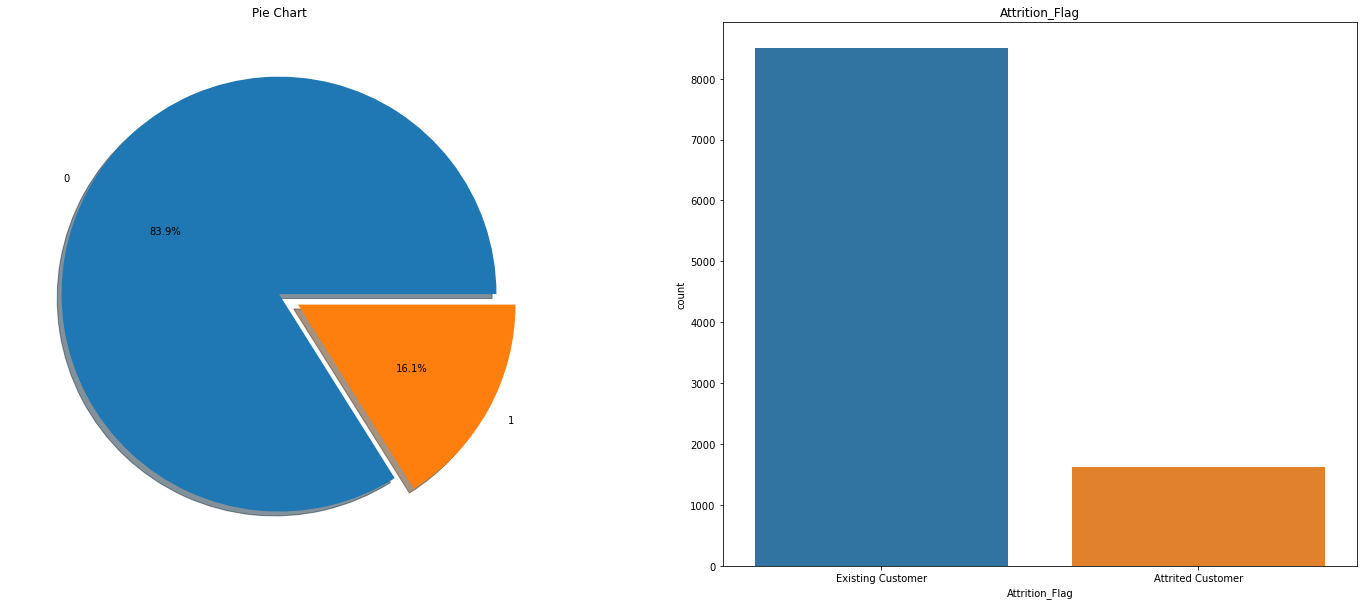

In [500]:
# The distribution of the Attrition Flag variable in the dataset is plotted as pie and columns graphs.
import seaborn as sns
f,ax=plt.subplots(1,2,figsize=(25,10))
data['Attrition_Flag'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Pie Chart')
ax[0].set_ylabel('')
sns.countplot('Attrition_Flag',data=df,ax=ax[1])
ax[1].set_title('Attrition_Flag')
plt.show()

 ## Separate the Features (X) from the Target (y)

In [536]:
y = data["Attrition_Flag"]
X = data.drop(columns="Attrition_Flag")

In [553]:
X = pd.get_dummies(X)
print (X)

       CLIENTNUM  Customer_Age  Dependent_count  Months_on_book  Gender_F  \
0      768805383            45                3              39         0   
1      818770008            49                5              44         1   
2      713982108            51                3              36         0   
3      769911858            40                4              34         1   
4      709106358            40                3              21         0   
...          ...           ...              ...             ...       ...   
10122  772366833            50                2              40         0   
10123  710638233            41                2              25         0   
10124  716506083            44                1              36         1   
10125  717406983            30                2              36         0   
10126  714337233            43                2              25         1   

       Gender_M  Education_Level_College  Education_Level_Doctorate  \
0   

 ## Split our data into training and testing

In [539]:
X_train, X_test, y_train, y_test = train_test_split(X,
    y, random_state=1, stratify=y)

In [540]:
# implement random oversampling
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

Counter(y_train)

Counter({0: 6375, 1: 1220})

 ## Create a Logistic Regression Model

In [528]:
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [543]:
# Display the confusion matrix
y_pred =  classifier.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[2125,    0],
       [ 407,    0]], dtype=int64)

In [549]:
#Confusion Matrix
confusion_matrix(y_test, y_pred)
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.84      1.00      0.00      0.91      0.00      0.00      2125
          1       0.00      0.00      1.00      0.00      0.00      0.00       407

avg / total       0.70      0.84      0.16      0.77      0.00      0.00      2532



In [550]:
#Accurancy Test 
balanced_accuracy_score(y_test, y_pred)

0.5

 ## Make predictions

In [508]:
# Predict outcomes for test data set
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
8831,Existing Customer,Existing Customer
6274,Existing Customer,Existing Customer
870,Existing Customer,Existing Customer
4960,Existing Customer,Existing Customer
7906,Existing Customer,Attrited Customer
...,...,...
5679,Existing Customer,Existing Customer
6672,Existing Customer,Existing Customer
5305,Existing Customer,Existing Customer
1582,Existing Customer,Attrited Customer


In [510]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {balanced_accuracy_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,0,407
Actual 1,0,2125


Accuracy Score : <function balanced_accuracy_score at 0x0000026ED6848558>
Classification Report
                   precision    recall  f1-score   support

Attrited Customer       0.00      0.00      0.00       407
Existing Customer       0.84      1.00      0.91      2125

         accuracy                           0.84      2532
        macro avg       0.42      0.50      0.46      2532
     weighted avg       0.70      0.84      0.77      2532

